In [58]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [59]:
filePath = "/Users/macbookpro/Documents/ML/ml-coder/decision-tree/Decision_Tree_ Dataset.csv"
balance_data = pd.read_csv(filePath)
if 'sum' in balance_data.columns:
    balance_data = balance_data.drop("sum", axis=1) 
else:
    print("There are no 'sum' in the balance data column")
    
balance_data.columns = ['Initial Payment', 'Last Payment', 'Credit Score', 'House Number', "Result"]


X = balance_data.iloc[:, 0:4]
y = balance_data.iloc[:, -1]


In [60]:

le = LabelEncoder()
y_train_form = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.9750


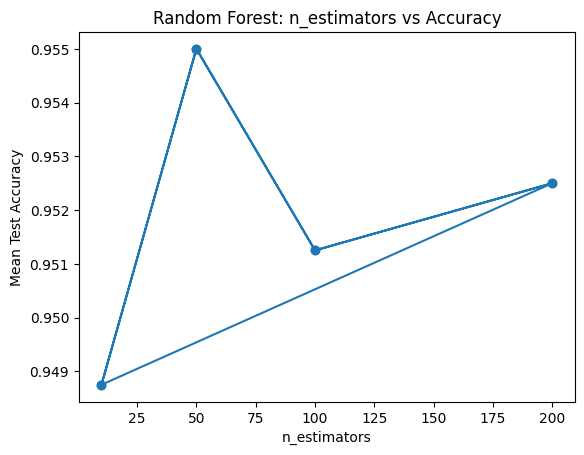

In [62]:
import matplotlib.pyplot as plt

# Extract results from GridSearchCV
results = grid_search.cv_results_

best_min_samples_split = grid_search.best_params_['min_samples_split']
best_max_depth = grid_search.best_params_['max_depth']

# Filter rows where min_samples_split and max_depth match their best values
filtered_results = [
    (params, mean_score)
    for params, mean_score in zip(results['params'], results['mean_test_score'])
    if params['min_samples_split'] == best_min_samples_split
    and params['max_depth'] == best_max_depth
]

# Extract n_estimators and mean_test_scores from filtered results
n_estimators_values = [params['n_estimators'] for params, _ in filtered_results]
mean_test_scores = [mean_score for _, mean_score in filtered_results]

# Plot n_estimators vs accuracy
plt.plot(n_estimators_values, mean_test_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.title('Random Forest: n_estimators vs Accuracy')
plt.show()